In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-violence-2000-school-shootings-in-21-months/School Shootings USA - export-e539e0ac-0abf-4be7-a200-61ce9fdec074.csv
/kaggle/input/usa-violence-2000-school-shootings-in-21-months/export-e539e0ac-0abf-4be7-a200-61ce9fdec074.csv


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [3]:
df = pd.read_csv('/kaggle/input/usa-violence-2000-school-shootings-in-21-months/School Shootings USA - export-e539e0ac-0abf-4be7-a200-61ce9fdec074.csv')

In [4]:
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Business/Location Name,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
0,2241994,25/02/2022,North Carolina,Charlotte,2219 Senior Dr,West Charlotte High School,0,0,0,0,0
1,2241810,25/02/2022,Florida,Niceville,800 E John Sims Pkwy,Niceville High School,0,0,0,0,1
2,2242123,25/02/2022,Florida,Miami,10655 SW 97th Ave,Miami Killian Senior High School,0,0,0,0,2
3,2245393,28/02/2022,California,Stockton,100 Doctor MLK Jr Blvd,Edison High School,0,0,0,0,1
4,2243754,28/02/2022,North Carolina,Parkton,400 N Green St,Parkton Elementary School,0,0,0,0,0


## Checking Data

In [5]:
df.dtypes

Incident ID                int64
Incident Date             object
State                     object
City Or County            object
Address                   object
Business/Location Name    object
Victims Killed             int64
Victims Injured            int64
Suspects Killed            int64
Suspects Injured           int64
Suspects Arrested          int64
dtype: object

In [6]:
df.isna().sum()

Incident ID                0
Incident Date              0
State                      0
City Or County             0
Address                   17
Business/Location Name    49
Victims Killed             0
Victims Injured            0
Suspects Killed            0
Suspects Injured           0
Suspects Arrested          0
dtype: int64

In [7]:
df['Incident Date'] = df['Incident Date'].astype('datetime64[ns]')

/tmp/ipykernel_19/4107405487.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Incident Date'] = df['Incident Date'].astype('datetime64[ns]')


## 100+ School Gun Shootings in each of Florida, Georgia, North Carolina, Texas

In [8]:
statewise_incident = df.groupby('State',as_index = False)['Incident ID'].count()
statewise_incident.rename(columns={'Incident ID':'Number of School Gun Shootings'},inplace =True)
statewise_incident.head()

,State,Number of School Gun Shootings
0,Alabama,58
1,Alaska,6
2,Arizona,40
3,Arkansas,29
4,California,95


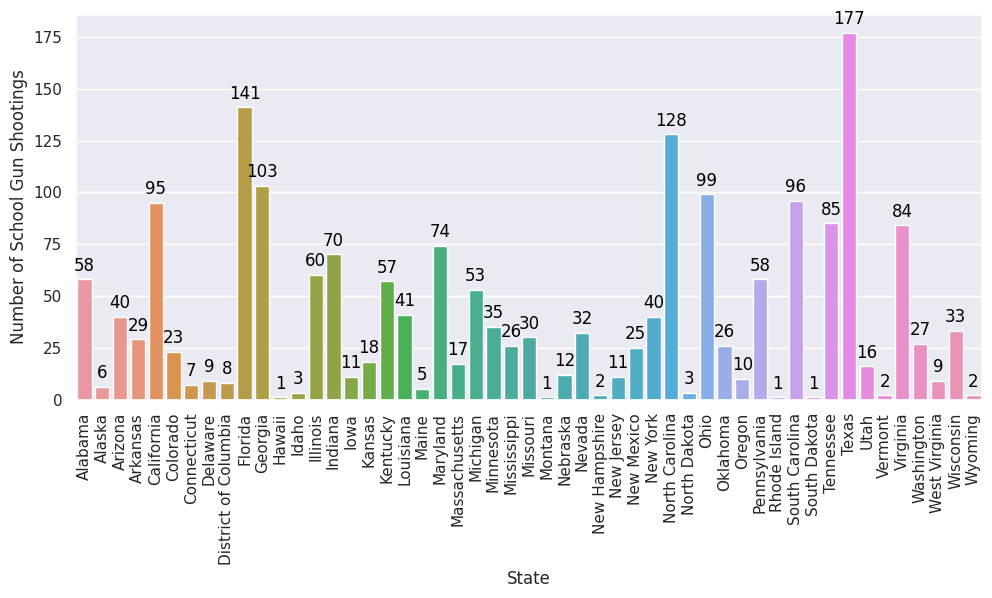

In [9]:
sns.set(rc = {'figure.figsize':(11.7,5)})
ax1 = sns.barplot(data = statewise_incident,x ='State',y ='Number of School Gun Shootings',errorbar = None)
for p in ax1.patches: #patches : Individual bar
#     p.get_x() in the context of a Seaborn bar plot refers to the x-coordinate of the left side of the bar represented by the patch p
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
#     xytext parameter specifies the position of the text annotation relative to the specified xy (x, y) position. 
plt.xticks(rotation = 90)
plt.show()

## Most Total Victims Killed in Texas

In [10]:
statewise_victims_killed = df.groupby('State',as_index = False)['Victims Killed'].sum()
statewise_victims_killed.head()

,State,Victims Killed
0,Alabama,0
1,Alaska,0
2,Arizona,1
3,Arkansas,2
4,California,4


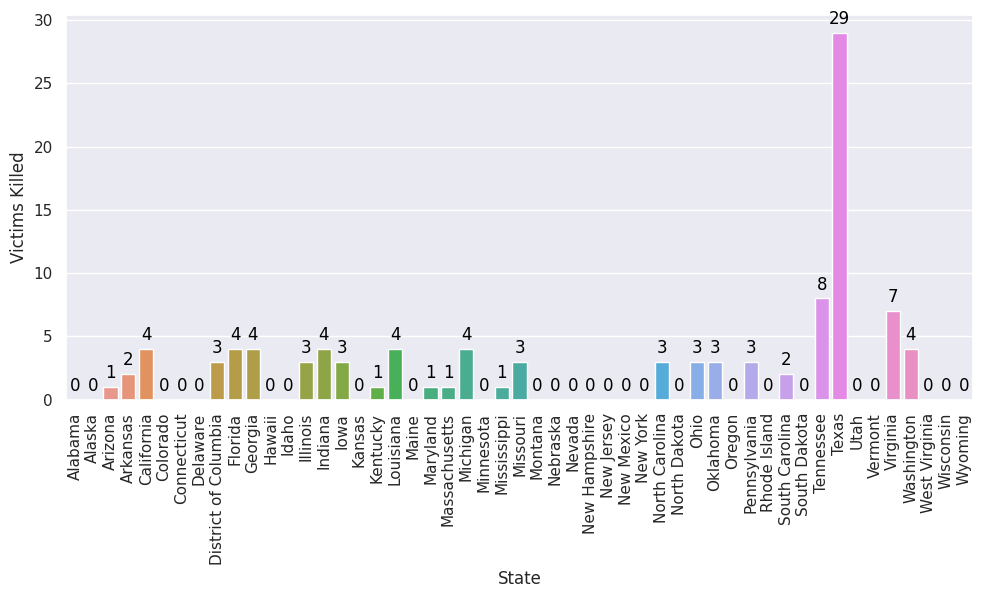

In [11]:
sns.set(rc = {'figure.figsize':(11.7,5)})
ax = sns.barplot(data = statewise_victims_killed,x ='State',y ='Victims Killed',errorbar = None)
for p in ax.patches: #patches : Individual bar
#     p.get_x() in the context of a Seaborn bar plot refers to the x-coordinate of the left side of the bar represented by the patch p
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
#     xytext parameter specifies the position of the text annotation relative to the specified xy (x, y) position. 
plt.xticks(rotation = 90)
plt.show()

## Most Total Victims Injured in Texas

In [12]:
statewise_victims_injured = df.groupby('State',as_index = False)['Victims Injured'].sum()
statewise_victims_injured.head()

,State,Victims Injured
0,Alabama,6
1,Alaska,0
2,Arizona,4
3,Arkansas,3
4,California,15


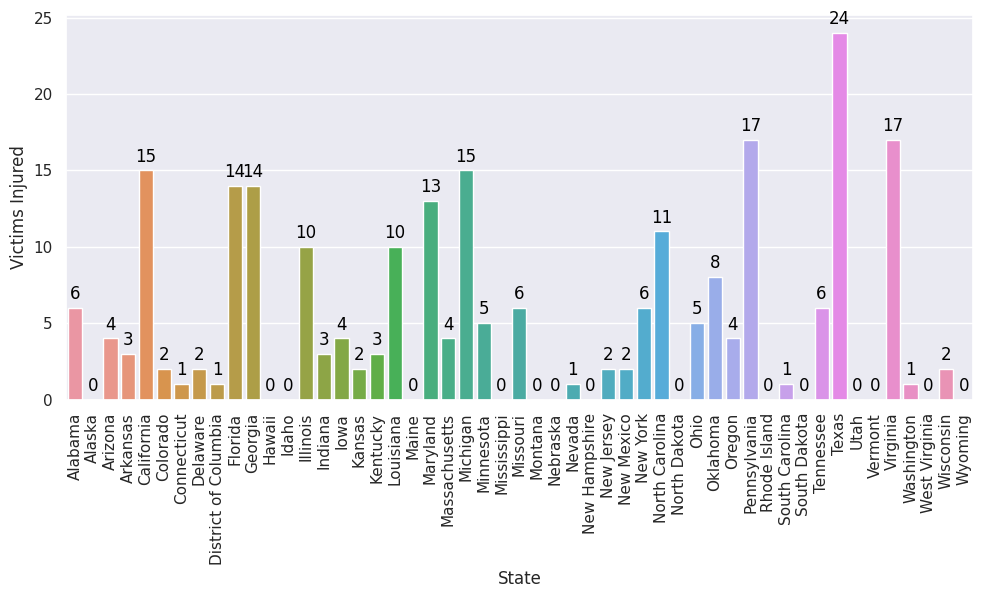

In [13]:
sns.set(rc = {'figure.figsize':(11.7,5)})
ax = sns.barplot(data = statewise_victims_injured,x ='State',y ='Victims Injured',errorbar = None)
for p in ax.patches: #patches : Individual bar
#     p.get_x() in the context of a Seaborn bar plot refers to the x-coordinate of the left side of the bar represented by the patch p
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
#     xytext parameter specifies the position of the text annotation relative to the specified xy (x, y) position. 
plt.xticks(rotation = 90)
plt.show()

## 25 August, 2023 : Most Violent day in USA (14 Shootings)

In [14]:
daily_incident = df.groupby('Incident Date',as_index = False)['Incident ID'].count()
daily_incident.rename(columns={'Incident ID':'Number of School Gun Shootings'},inplace =True)
daily_incident.sort_values('Number of School Gun Shootings',ascending = False)

,Incident Date,Number of School Gun Shootings
363,2023-08-25,14
109,2022-08-30,13
123,2022-09-16,13
295,2023-04-24,13
108,2022-08-29,12
...,...,...
88,2022-07-20,1
372,2023-09-07,1
328,2023-06-08,1
369,2023-09-02,1


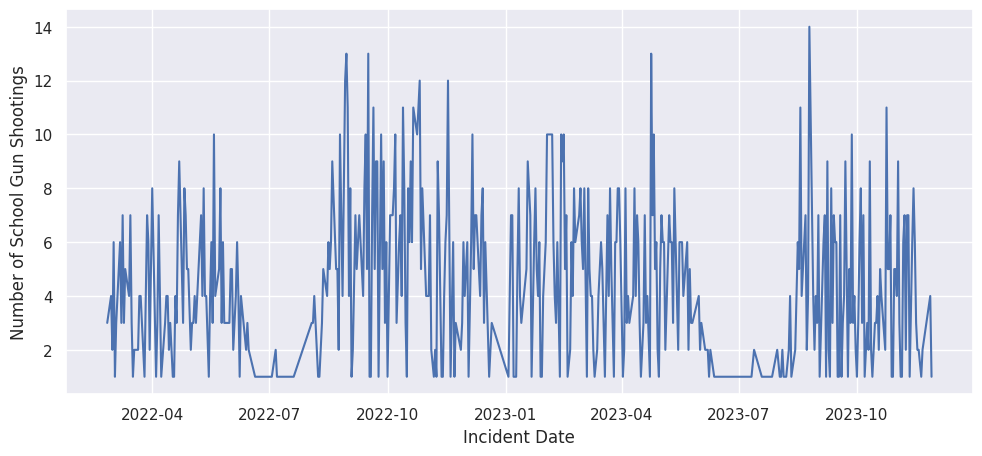

In [15]:
sns.set(rc = {'figure.figsize':(11.7,5)})
sns.lineplot(data = daily_incident,x ='Incident Date',y='Number of School Gun Shootings')
plt.show()